# Лабораторная работа 4
## Yolo

Попов Илья 406

### Датасет

Мнтируем Google Drive для доступа к данным. Задаются пути к папкам с изображениями и метками. Далее происходит загрузка [датасета](https://www.kaggle.com/code/gauravduttakiit/class-dataset-great-barrier-reef-classification) из CSV-файла.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Задаем пути к папкам с изображениями и метками.

In [ ]:
dir ='/content/drive/MyDrive/reef'
dir_images = f"{dir}/images"
dir_labels = f"{dir}/labels"

In [ ]:
import pandas as pd

Проверяем успешность доступа к данным

In [ ]:
df = pd.read_csv(f"{dir}/train.csv")
df.head()

,video_id,sequence,video_frame,sequence_frame,image_id,annotations
0,0,40258,0,0,0-0,[]
1,0,40258,1,1,0-1,[]
2,0,40258,2,2,0-2,[]
3,0,40258,3,3,0-3,[]
4,0,40258,4,4,0-4,[]


### Подготовка к обучению

In [ ]:
from tqdm import tqdm
import PIL
import os

Просматриваем каждую строку в DataFrame, создаем пути к файлам изображений и меток, проверяет их наличие. Если изображение отсутствует или не содержит аннотаций, оно удаляется. Для каждой аннотации создается строка с координатами и размерами объекта на изображении, записываемая в файл метки.

In [ ]:
for _, row in tqdm(df.iterrows()):
    id = row['video_frame']
    img_file = f"{dir_images}/{id}.jpg"
    label_file = f"{dir_labels}/{id}.txt"

    if not os.path.exists(img_file):
        continue

    annotations = eval(row['annotations'])
    if len(annotations) == 0:
        os.remove(img_file)
        continue

    with PIL.Image.open(img_file) as img:
        w, h = img.size

    with open(label_file, 'w') as f:
        for annot in annotations:
            f.write(f"0 {annot['x']/w} {annot['y']/h} {annot['width']/w} {annot['height']/h}\n")

23501it [00:07, 3088.77it/s]


In [ ]:
with open('./data/reef.yaml', 'w') as f:
    f.write(f'path: {dir}\n')
    f.write(f'train: images\n')
    f.write(f'val: images\n')
    f.write('nc: 1\n')
    f.write('names: [\'corall\']\n')

### Обучение

Эта команда запускает скрипт train.py для обучения модели на изображениях. Я устанавливаю размер изображений для обучения равным 1000x1000 пикселей , размер пакета (batch size) в 4 изображения
, а количество эпох обучения - 25. Для конфигурации данных используется файл reef.yaml, который определяет пути к данным, количество классов и другие параметры. Начальные веса модели загружаются из файла yolov5s.pt. Для определения гиперпараметров обучения используется файл hyp.scratch-low.yaml.

In [ ]:
!python train.py --img 1000 --batch 4 --epochs 25 --data reef.yaml --weights yolov5s.pt --hyp data/hyps/hyp.scratch-low.yaml

train: weights=yolov5s.pt, cfg=, data=reef.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=25, batch_size=4, imgsz=1000, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-140-g1db9533 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, deg

### Результат обучения

In [ ]:
import IPython

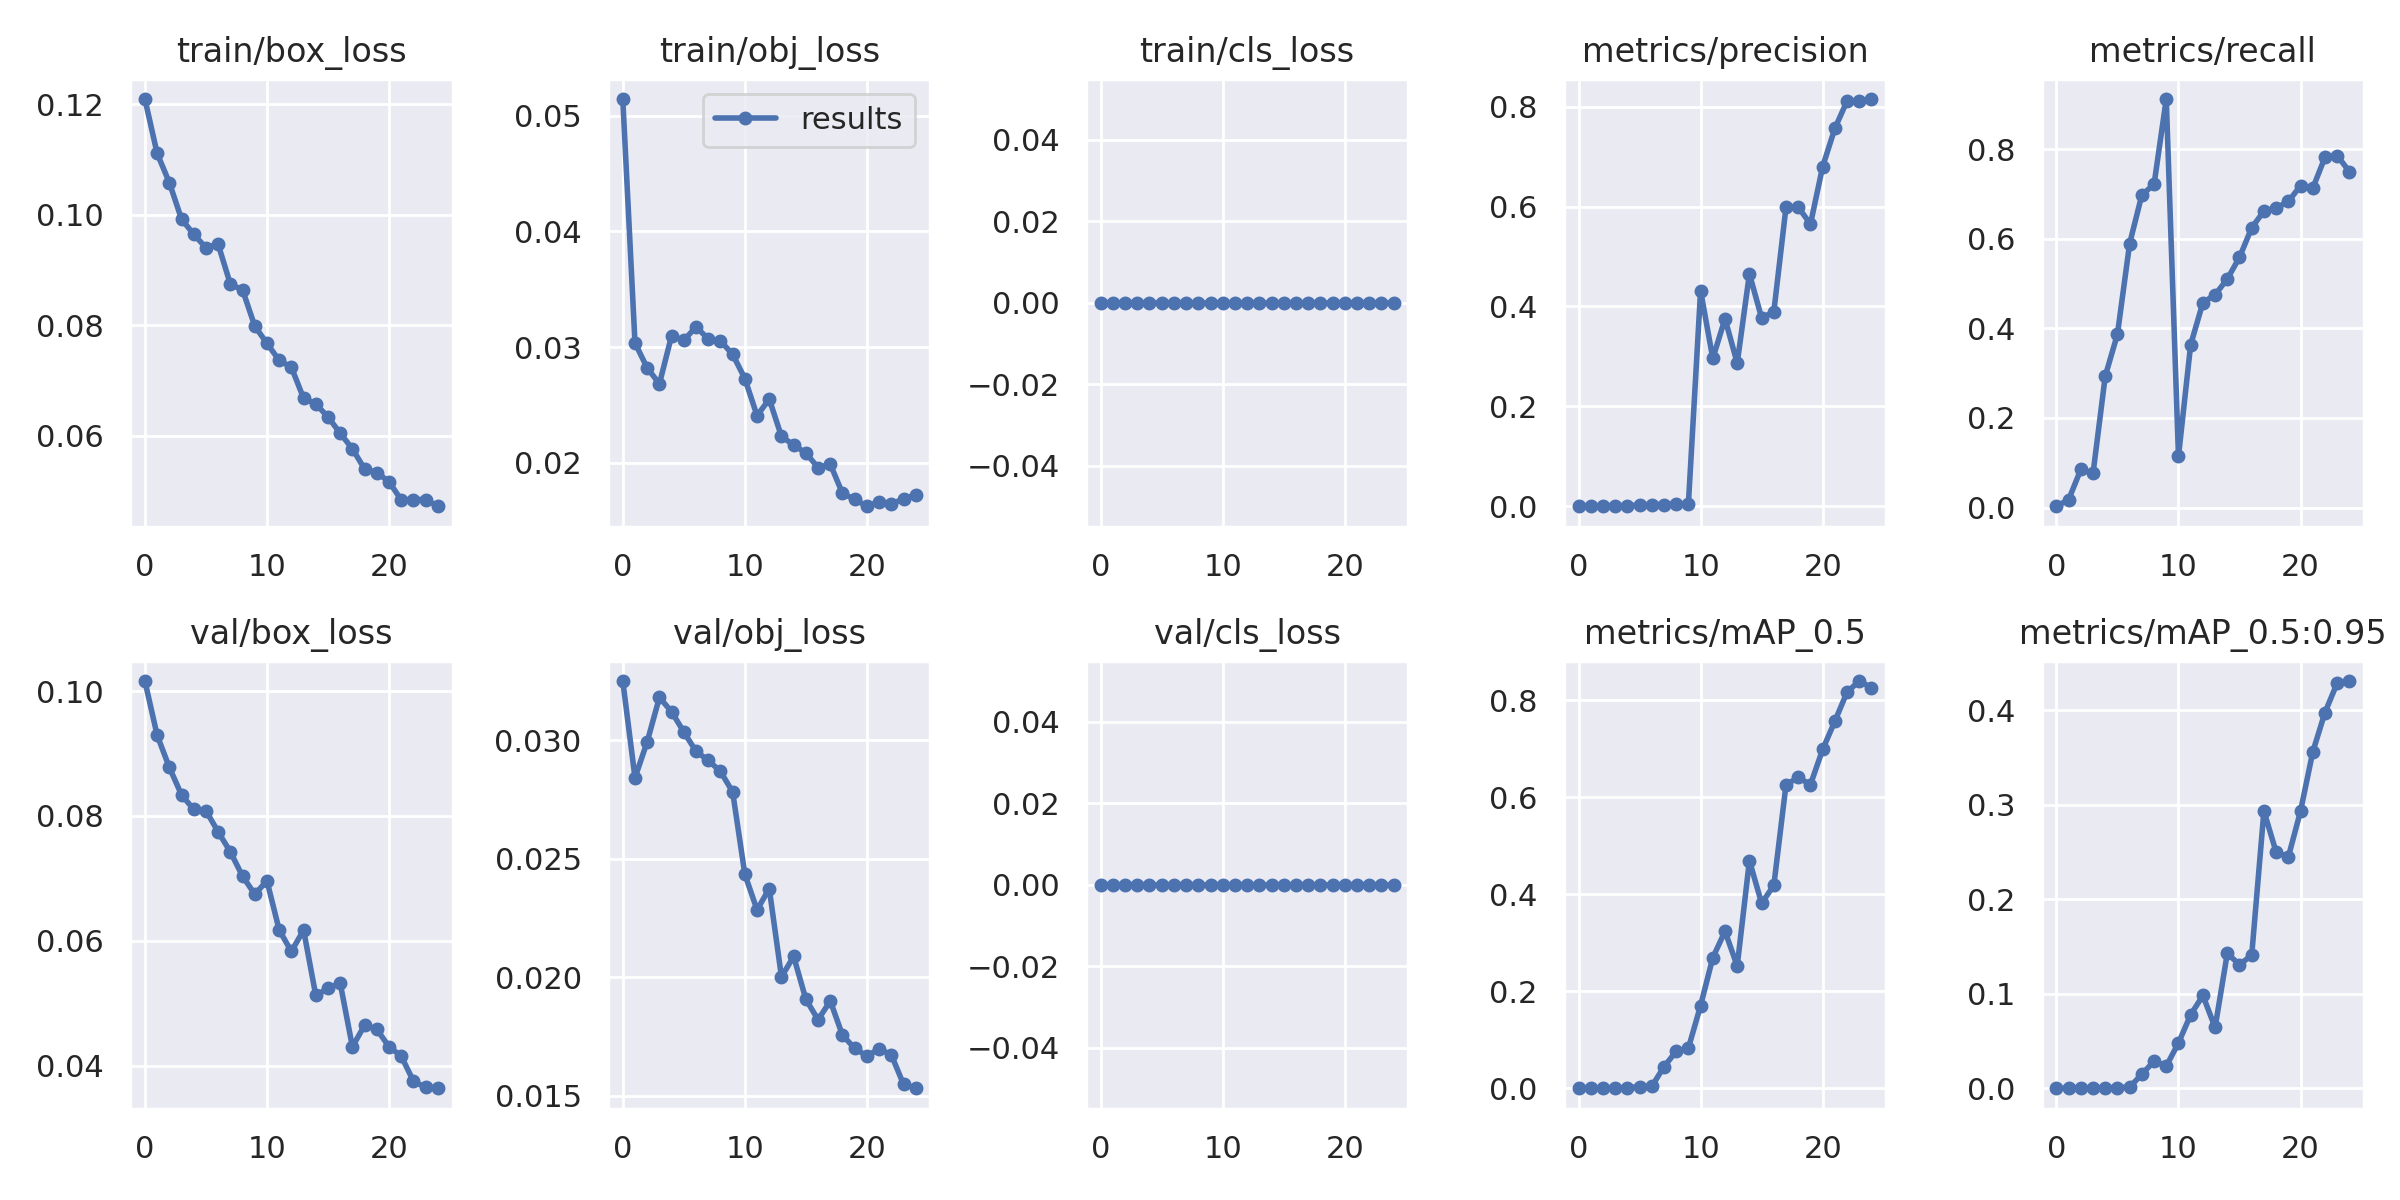

In [ ]:
IPython.display.Image('/content/yolov5/runs/train/exp4/results.png', width=960)

#### Рассмотрим полученные метрики:

Исходя из этих метрик и изменений функции потерь на графике, можно сделать вывод о том, что модель успешно учится и делает значительные улучшения в качестве своих предсказаний. Однако, несмотря на улучшения, значение mAP_0.5_0.95 все еще относительно низкое, что может свидетельствовать о сложности обнаружения объектов с различными уровнями перекрытия (IoU). Это может быть одним из аспектов, на которые нужно обратить внимание для дальнейшего улучшения модели.

### Вывод
В ходе выполнения данной лабораторной работы я научился обрабатывать данные используя модель YOLOv5 для обучения и детекции объектов. Мы обучили модель на этих данных, определив размер изображений, количество эпох обучения и другие гиперпараметры.


Мы видим, что модель YOLOv5 улучшается в процессе обучения, что подтверждается уменьшением функции потерь. Однако, несмотря на это, метрика mAP_0.5_0.95 остается относительно низкой. Это может указывать на то, что модель имеет сложности в обнаружении объектов с разными уровнями перекрытия.